<a href="https://colab.research.google.com/github/aslla77/practice-Python/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8/03_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [3]:
fish=pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [8]:
fish_input=fish.values[:,1:]
print(fish_input[:5])

[[242.0 25.4 30.0 11.52 4.02]
 [290.0 26.3 31.2 12.48 4.3056]
 [340.0 26.5 31.1 12.3778 4.6961]
 [363.0 29.0 33.5 12.73 4.4555]
 [430.0 29.0 34.0 12.444 5.134]]


In [10]:
fish_target=fish['Species'].to_numpy()
print(fish_target[:5])

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [13]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target= train_test_split(fish_input,fish_target, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

In [15]:
from sklearn.linear_model import SGDClassifier

sc=SGDClassifier(loss='log',max_iter=10,random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [16]:
sc.partial_fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8151260504201681
0.85


In [17]:
sc1=SGDClassifier(loss='log',random_state=42)
train_score=[]
test_score=[]

classes=np.unique(train_target)


In [19]:
for _ in range(0,300):
  sc1.partial_fit(train_scaled,train_target,classes=classes)
  train_score.append(sc1.score(train_scaled,train_target))
  test_score.append(sc1.score(test_scaled,test_target))


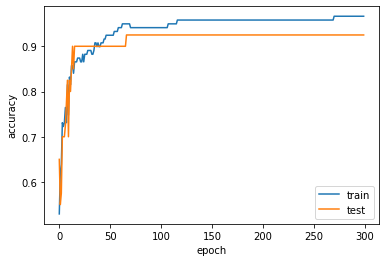

In [23]:
plt.plot(train_score,label='train')
plt.plot(test_score,label='test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

In [24]:
sc=SGDClassifier(loss='log',max_iter=100,tol=None,random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.957983193277311
0.925


In [25]:
sc=SGDClassifier(loss='hinge',max_iter=100,tol=None,random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.9495798319327731
0.925
